We all know that when training any AI model, beside data, the most important thing is the architecture of the model and the hyperparameters. In this part, I'll show you the popular and easy to approach method to tune hyperparameters of the model, which is Grid Search.

But before dive into it, why do we need to tune hyperparameters? Why don't we just gave it all the default variable like what we've been told to do ?

Well, the answer is simple, because the default hyperparameters are not always the best. They are just the default values that the library provides for place holder, also widly used. And the best hyperparameters are the one that can make the model perform the best on the dataset.

So, what is Grid Search?

The grid search is the most common hyperparameter tuning approach given its simple and straightforward procedure. It is an uninformed search method, which means that it does not learn from its previous iterations.

Using this method entails testing every unique combination of hyperparameters in the search space to determine the combination that yields the best performance.

It’s easy to see the benefits of such a brute-force method; what better way to find the best solution than to try all of them out?

Unfortunately, this approach does not scale well; an increase in the size of the hyperparameter search space will result in an exponential rise in run time and computation.

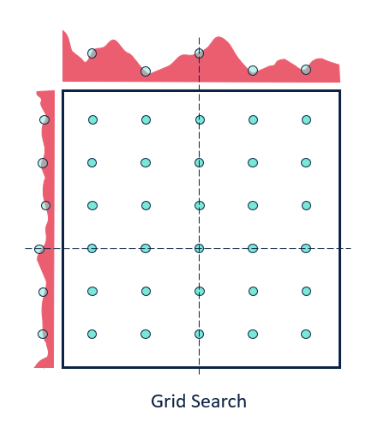

If we want to test values for each of these hyperparameters using grid search, we would provide a list of possible values for each hyperparameter (e.g., 10, 20, and 30 for the minimum records to split a node, and 2, 3, and 4 for maximum depth) and grid search would train a new decision tree model with every possible combination of values to find the best possible set of hyperparameter values. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a basic RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




As you can probably imagine, this can get out of control pretty quickly. In our example, we are only tuning two hyperparameters with three values each, but a total of nine different models will be trained to find the best pair of values. Although hyperparameter tuning is easy to parallelize (or, known as an embarrassingly parallel problem in computer science parlance), it is still a time-consuming process without a guarantee of finding the best possible values.

Another issue with grid search is that it is testing incremental values - so if the best possible value for the minimum number of records is actually 25, grid search will never find it unless it is specifically specified. 

So to summary, Grid Search can mostly fit in any situation, but it's not always the best choice. It's not suitable for large dataset or complex model, because it will take a lot of time to run.